# Ford GoBike Trip Data - Slide Deck
## by Eslam Aly

## Investigation Overview

> I am most interested in figuring out the best features that affect the trips durations. So, i generated some plot to describe more my findings.

## Dataset Overview

> This data set includes information about individual rides made in Ford GoBike system covering the greater San Francisco Bay area in 2018.
> The dataset contains about 183,000 rows and 16 features.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.dropna(axis = 0, inplace = True)
df.drop(df.query('member_birth_year < 1903').index, axis = 0, inplace = True)
df.member_birth_year = 2018 - df.member_birth_year
df.rename(columns = {'member_birth_year': 'member_age'}, inplace = True)

## Visualization 1: Counts of Trip Durations

. The trip durations in sec is right skewed with a peak of around 500 (noting that the median calculated above is 510).

. The data has a maximum of trip durations of 84,548 sec = 23 hrs, which is a very large duration. So, i excluded large durations (more than 3000 sec = 50 mins).

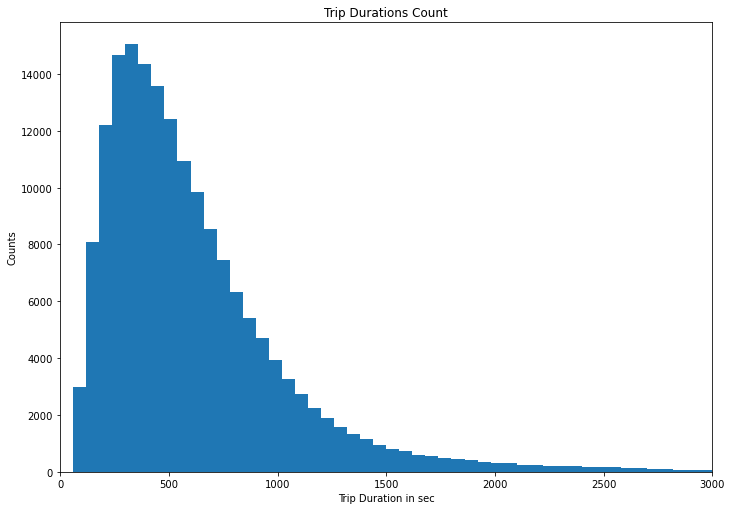

In [8]:
plt.figure(figsize=[ 11.69, 8.27])
bins = np.arange(0, 3000+60, 60)
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xlim(0, 3000);
plt.xlabel('Trip Duration in sec');
plt.ylabel('Counts');
plt.title('Trip Durations Count');

## Visualization 2: Counts of Members Genders

. Males are more frequent to use bikes as a transportation method.

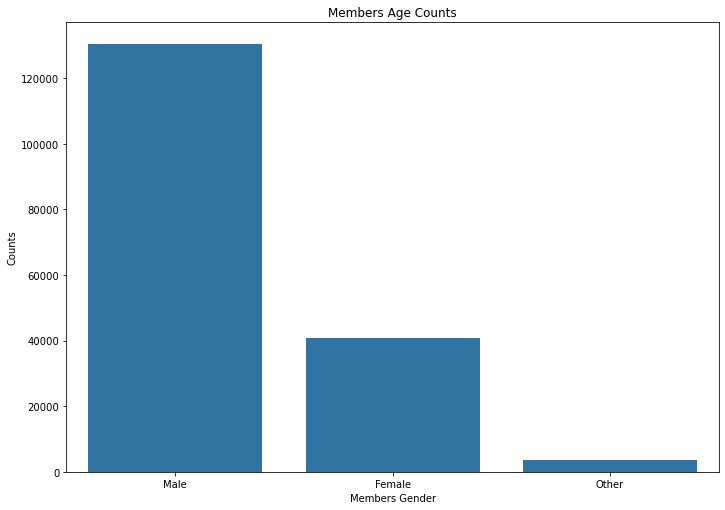

In [9]:
plt.figure(figsize=[ 11.69, 8.27])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = default_color, order = df.member_gender.value_counts().index);
plt.xlabel('Members Gender')
plt.ylabel('Counts');
plt.title('Members Age Counts');

## Visualization 3: Counts of Members Genders

. Surprisingly, the females are making slightly higher durations than men drivers.

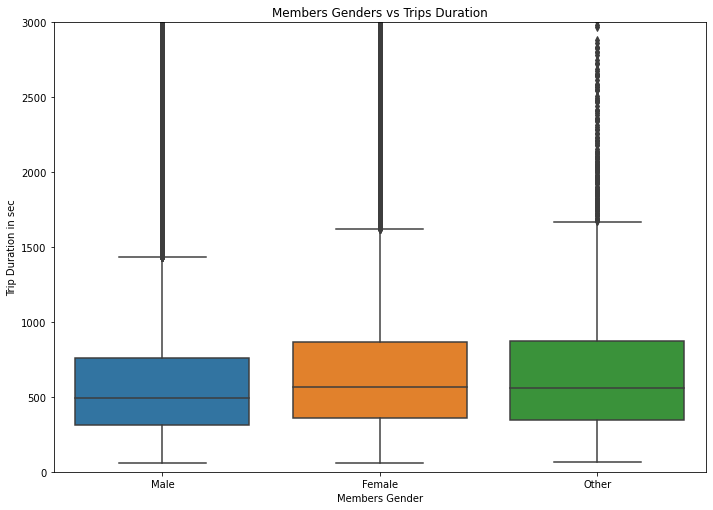

In [14]:
fig = plt.figure(figsize = (11.69, 8.27));
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', order = df.member_gender.value_counts().index);
plt.ylim(0, 3000);
plt.xlabel('Members Gender');
plt.ylabel('Trip Duration in sec');
plt.title('Members Genders vs Trips Duration');

## Visualization 4: Members Age vs. Trip Duration vs. Members Gender

. Men with high age are making higher trip durations more than females with high age.

. In low age comparison, the number are mostly the same.

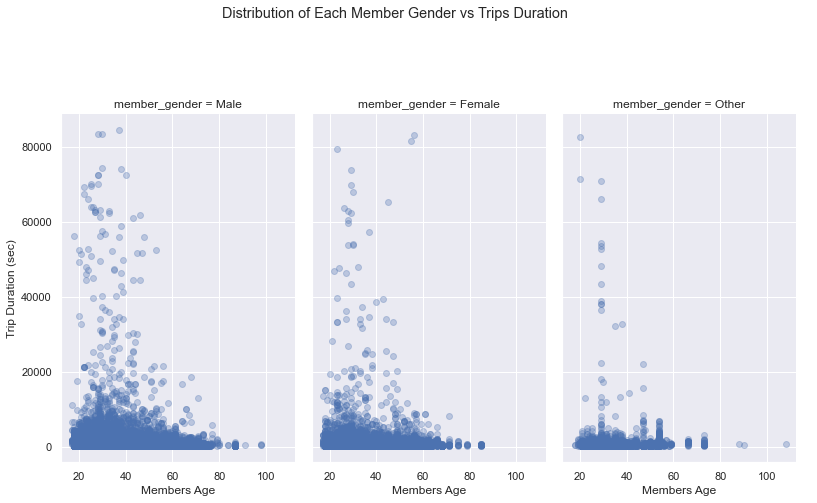

In [56]:
g = sb.FacetGrid(data = df, col = 'member_gender', col_order = df.member_gender.value_counts().index)
g.map(plt.scatter, 'member_age', 'duration_sec', alpha = 0.3)
g.add_legend();
plt.gcf().set_size_inches(11.69, 8.27);
g.set_axis_labels("Members Age", "Trip Duration (sec)");
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Each Member Gender vs Trips Duration');

## Visualization 5: Members Age vs. Trip Duration vs. Users Type

. Female customrs are making higher durations than male customers and all subscribers.

. Female subscribers are making higher durations than male subscribers.

. My increasing tendency is even more increased. Even males counts is much higher than females, the females drivers are making higher trips than men whether they are customers or subscribers.

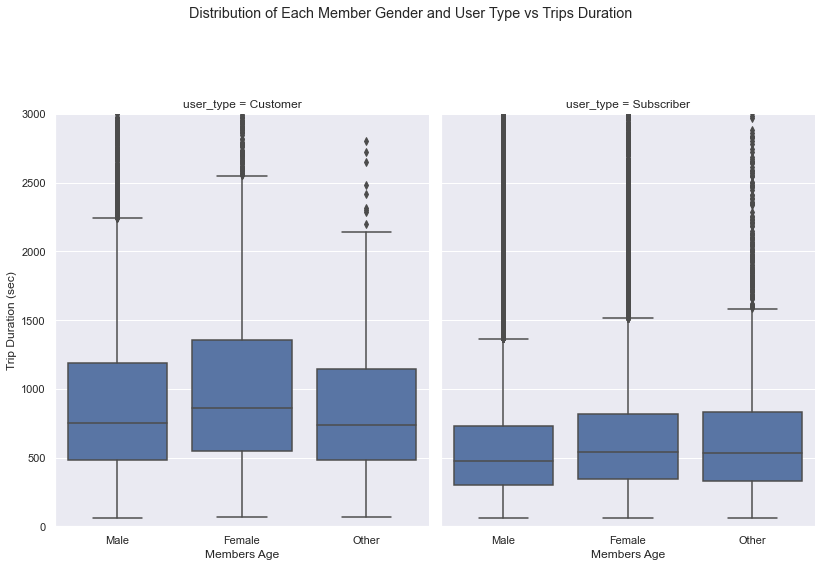

In [57]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 6)
g.map(sb.boxplot, 'member_gender', 'duration_sec', order = df.member_gender.value_counts().index)
plt.ylim(0, 3000);
g.add_legend();
plt.gcf().set_size_inches(11.69, 8.27);
g.set_axis_labels("Members Age", "Trip Duration (sec)");
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Each Member Gender and User Type vs Trips Duration');